In [6]:
import pandas as pd

In [24]:
#read into the main body of data (there are three files to read)
#jobs implies the 'jobs' the request of which has been sent to the servers at ACCRE
jobs = pd.read_csv('../data/fullsample.csv')
jobs.head(2)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0


In [11]:
#turn the BEGIN and END columns data type into datetime
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') #coerce turns the unknown data types into nulls
jobs['END'] = pd.to_datetime(jobs['END'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [57]:
#save the jobs with null BEGIN/END in separate CSVs, for later use (maybe)
jobs_null_begin = jobs[jobs['begin'].isnull()].reset_index()
jobs_null_begin = jobs_null_begin.to_csv('Jobs-with-null-begin', index = False)

jobs_null_end = jobs[jobs['end'].isnull()].reset_index()
jobs_null_end = jobs_null_end.to_csv('Jobs-with-null-end', index = False)


In [64]:
#since I have already worked on 'jobs', I keep its name as it is
# delimit jobs to where BEGIN/END is not null (following the instructions)
jobs = jobs[jobs['begin'].notnull() & jobs['end'].notnull()].reset_index()


In [41]:
#break the begin/end times into separate columns
jobs['end_date'] = jobs['END'].dt.date
jobs['end_year'] = jobs['END'].dt.year
jobs['end_month'] = jobs['END'].dt.month
jobs['end_week'] = jobs['END'].dt.week
jobs['end_hour'] = jobs['END'].dt.hour

jobs['begin_date'] = jobs['BEGIN'].dt.date
jobs['begin_year'] = jobs['BEGIN'].dt.year
jobs['begin_month'] = jobs['BEGIN'].dt.month
jobs['begin_week'] = jobs['BEGIN'].dt.week
jobs['begin_hour'] = jobs['BEGIN'].dt.hour

/var/folders/cl/6732l4td4930rpqrp4rpmpt80000gn/T/ipykernel_40289/3270307924.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  jobs['end_week'] = jobs['END'].dt.week
/var/folders/cl/6732l4td4930rpqrp4rpmpt80000gn/T/ipykernel_40289/3270307924.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  jobs['begin_week'] = jobs['BEGIN'].dt.week


In [74]:
pd.options.display.max_columns = 50

In [75]:
#change column names based on the instructions
jobs = jobs.rename(columns=str.lower)
jobs

,level_0,index,jobid,state,begin,end,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,end_year,end_month,end_date,end_week,end_hour,begin_year,begin_month,begin_date,begin_week,begin_hour
0,0,1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,2021.0,9.0,2021-09-05,35.0,11.0,2021.0,8.0,2021-08-06,31.0,11.0
1,1,2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,2021.0,9.0,2021-09-05,35.0,19.0,2021.0,8.0,2021-08-06,31.0,19.0
2,2,3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,2021.0,9.0,2021-09-07,36.0,20.0,2021.0,8.0,2021-08-09,32.0,16.0
3,3,4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,2021.0,9.0,2021-09-10,36.0,16.0,2021.0,8.0,2021-08-17,33.0,7.0
4,4,5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0,2021.0,9.0,2021-09-06,36.0,16.0,2021.0,8.0,2021-08-17,33.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395229,7395229,7395880,25493434,COMPLETED,2020-10-31 23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2-00:00:00,00:01:46,1,1,sam,0:0,2020.0,10.0,2020-10-31,44.0,23.0,2020.0,10.0,2020-10-31,44.0,23.0
7395230,7395230,7395881,25493435,COMPLETED,2020-10-31 23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2-00:00:00,00:01:25,1,1,sam,0:0,2020.0,10.0,2020-10-31,44.0,23.0,2020.0,10.0,2020-10-31,44.0,23.0
7395231,7395231,7395882,25493476,COMPLETED,2020-10-31 23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,12:00:00,00:03:14,1,1,production,0:0,2020.0,10.0,2020-10-31,44.0,23.0,2020.0,10.0,2020-10-31,44.0,23.0
7395232,7395232,7395883,25493515,COMPLETED,2020-10-31 23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2-00:00:00,00:01:56,1,1,sam,0:0,2020.0,10.0,2020-10-31,44.0,23.0,2020.0,10.0,2020-10-31,44.0,23.0


In [ ]:
jobs['STATE'].value_counts()a

COMPLETED              1044427
CANCELLED                  996
FAILED                     745
OUT_OF_MEMORY              642
CANCELLED by 486628        523
PENDING                    443
CANCELLED by 169069        381
RUNNING                    208
CANCELLED by 9201          107
CANCELLED by 885613         15
CANCELLED by 675240         13
CANCELLED by 855431         12
CANCELLED by 9202            8
CANCELLED by 491383          7
CANCELLED by 505355          6
CANCELLED by 9203            5
CANCELLED by 454080          3
CANCELLED by 885607          3
CANCELLED by 9206            3
CANCELLED by 36697           2
CANCELLED by 764663          2
CANCELLED by 0               2
NODE_FAIL                    2
CANCELLED by 341210          2
CANCELLED by 887337          2
CANCELLED by 783531          2
CANCELLED by 308082          1
CANCELLED by 784413          1
CANCELLED by 896711          1
CANCELLED by 9221            1
CANCELLED by 890137          1
CANCELLED by 891323          1
CANCELLE

In [ ]:
jobs['EXITCODE'].value_counts()

0:00           1046405
1:00              1120
0.086805556        642
0:15               175
0:09               154
2:00                23
0:02                16
0:07                15
127:00:00            8
0:11                 5
126:00:00            4
6:00                 2
121:00:00            2
3:00                 1
4:00                 1
24:00:00             1
13:00                1
Name: EXITCODE, dtype: int64

In [ ]:
jobs['PARTITION'].value_counts()

production              1019050
pascal                    12476
nogpfs                     7805
sam                        7053
maxwell                    1113
turing                      586
debug                       175
cgw-maizie                  134
cgw-platypus                 97
cgw-capra1                   43
cgw-hanuman                  21
cgw-dougherty1               11
cgw-tbi01                     5
cgw-vm-qa-flatearth1          4
cgw-rocksteady                1
cgw-sideshowbob               1
Name: PARTITION, dtype: int64

In [107]:
#make a new data frame with the jobs ended
jobs_ended = jobs[['end_date', 'end_year', 'end_month', 'end_week', 'end_hour']].reset_index(drop = True)
jobs_ended.head()

,end_date,end_year,end_month,end_week,end_hour
0,2021-09-05,2021.0,9.0,35.0,11.0
1,2021-09-05,2021.0,9.0,35.0,19.0
2,2021-09-07,2021.0,9.0,36.0,20.0
3,2021-09-10,2021.0,9.0,36.0,16.0
4,2021-09-06,2021.0,9.0,36.0,16.0


In [70]:
#delimit to the jobs that are completed in state
jobs_completed = jobs[jobs['state'] == 'COMPLETED']
jobs_completed.head(2)

,level_0,index,jobid,state,begin,end,reqmem,usedmem,reqtime,usedtime,...,end_year,end_month,end_date,end_week,end_hour,begin_year,begin_month,begin_date,begin_week,begin_hour
0,0,1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,...,2021.0,9.0,2021-09-05,35.0,11.0,2021.0,8.0,2021-08-06,31.0,11.0
1,1,2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,...,2021.0,9.0,2021-09-05,35.0,19.0,2021.0,8.0,2021-08-06,31.0,19.0


In [71]:
# roll the jobs per hour but sort the values of the column first
jobs_completed = jobs_ended.sort_values('end')
jobs_completed['end_per_hour'] = jobs_ended.rolling('1h', on = 'end')['jobid'].count()
jobs_completed.head(2)

KeyError: 'end'

In [ ]:
#get info on the produced column
jobs_ended[['end_per_hour']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044427 entries, 951524 to 927388
Data columns (total 1 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   end_per_hour  1044427 non-null  float64
dtypes: float64(1)
memory usage: 15.9 MB


In [ ]:
#create new column: job length
jobs_ended['job_length'] = jobs_ended['END'] - jobs_ended['BEGIN']
jobs_ended.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,end_per_hour,job_length
951524,31197386_2177,COMPLETED,2021-08-15 00:00:12,2021-08-15 00:00:41,18432Mn,0,5:00:00,0:00:29,1,1,production,0:00,1.0,0 days 00:00:29
927392,30504897_516,COMPLETED,2021-08-14 23:51:42,2021-08-15 00:00:42,8192Mc,16618.45M,2:00:00,0:09:00,1,4,production,0:00,2.0,0 days 00:09:00
951526,31197386_2179,COMPLETED,2021-08-15 00:00:12,2021-08-15 00:00:42,18432Mn,0,5:00:00,0:00:30,1,1,production,0:00,3.0,0 days 00:00:30
951527,31197386_2180,COMPLETED,2021-08-15 00:00:12,2021-08-15 00:01:04,18432Mn,14.95M,5:00:00,0:00:52,1,1,production,0:00,4.0,0 days 00:00:52
953616,31319286_79,COMPLETED,2021-08-14 20:09:37,2021-08-15 00:01:10,16384Mn,3399.79M,2-02:00:00,3:51:33,1,1,production,0:00,5.0,0 days 03:51:33


In [ ]:
ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log', sep=" - ", header=None)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [ ]:
#change column names
ce5 = ce5.rename(columns = {0:'date/time', 1:'user', 2:'retry', 3: 'laps', 4: 'returncode', 5: 'command'})
ce5.head()

,date/time,user,retry,laps,returncode,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [ ]:
#clean the columns
ce5['command'] = ce5['command'].str.extract('\[\'\/usr\/bin\/([a-zA-Z]*)')
ce5.head()

,date/time,user,retry,laps,returncode,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,sacct
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,sacct
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,sacct
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,sacct
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,sacct


In [ ]:
ce5['user'].str.slice(start = 5)
ce5['retry'] = ce5['retry'].str.slice(start = 6)
ce5['laps'] = ce5['laps'].str.slice(start = 5)
ce5['returncode'] = ce5['returncode'].str.slice(start = 11)
ce5.head()

,date/time,user,retry,laps,returncode,command
0,2020-10-16 08:15:39.278699,user 0,0,0.07347559928894043,0,sacct
1,2020-10-16 08:18:08.313309,user 0,0,0.18363237380981445,0,sacct
2,2020-10-16 08:22:48.128689,user 0,0,0.07547116279602051,0,sacct
3,2020-10-16 08:25:13.257408,user 0,0,0.09484362602233887,0,sacct
4,2020-10-16 08:31:01.460723,user 0,0,0.07498788833618164,0,sacct


In [ ]:
ce5.to_csv('ce5', index = False) #ignore previous indices

In [ ]:
#read through the third data set
ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log', sep=" - ", header=None)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
#clean the third data set in the same way as the second data set
ce6 = ce6.rename(columns = {0:'date/time', 1:'user', 2:'retry', 3: 'laps', 4: 'returncode', 5: 'command'})
ce6['command'] = ce6['command'].str.extract('\[\'\/usr\/bin\/([a-zA-Z]*)')
ce6['user'].str.slice(start = 5)
ce6['retry'] = ce6['retry'].str.slice(start = 6)
ce6['laps'] = ce6['laps'].str.slice(start = 5)
ce6['returncode'] = ce6['returncode'].str.slice(start = 11)

In [ ]:
#read ce6 into a new df
ce6.to_csv('ce6', index = False)

In [ ]:
#before concatenation, specify where the rows are coming from
ce5['server'] = 'ce5'
ce6['server'] = 'ce6'

In [ ]:
#concatinate the two DFs
ce5_ce6 = pd.concat([ce5, ce6]).reset_index(drop = True) #get rid of old indices
ce5_ce6


,date/time,user,retry,laps,returncode,command,server
0,2020-10-16 08:15:39.278699,user 0,0,0.07347559928894043,0,sacct,ce5
1,2020-10-16 08:18:08.313309,user 0,0,0.18363237380981445,0,sacct,ce5
2,2020-10-16 08:22:48.128689,user 0,0,0.07547116279602051,0,sacct,ce5
3,2020-10-16 08:25:13.257408,user 0,0,0.09484362602233887,0,sacct,ce5
4,2020-10-16 08:31:01.460723,user 0,0,0.07498788833618164,0,sacct,ce5
...,...,...,...,...,...,...,...
9547408,2021-10-07 21:59:35.014602,user 9221,0,0.060086965560913086,0,squeue,ce6
9547409,2021-10-07 21:59:35.238970,user 9202,0,0.09804415702819824,0,squeue,ce6
9547410,2021-10-07 21:59:57.265189,user 9203,0,0.02454972267150879,0,squeue,ce6
9547411,2021-10-07 22:00:04.024360,user 9201,0,0.03941917419433594,0,squeue,ce6


In [ ]:
#.astype(float) gave an error, but this did not:
ce5_ce6['laps'] = pd.to_numeric(ce5_ce6['laps'],errors='coerce') # coerce will replace all non-numeric values with NaN

In [ ]:
#sort the date/time column and change the type of datetime
ce5_ce6.sort_values('date/time', ascending = True)
ce5_ce6['date/time'] = pd.to_datetime(ce5_ce6['date/time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') 

In [ ]:
#Looking for specific settings (time out jobs)
time_out = ce5_ce6[(ce5_ce6['user'] == 'user 9204') &
 (ce5_ce6['returncode'] == '1') &
   (ce5_ce6['laps'] > 15) &
    (ce5_ce6['command'] == 'sbatch')]

In [ ]:
time_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3296 entries, 49958 to 9537761
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date/time   3296 non-null   datetime64[ns]
 1   user        3296 non-null   object        
 2   retry       3296 non-null   object        
 3   laps        3296 non-null   float64       
 4   returncode  3296 non-null   object        
 5   command     3296 non-null   object        
 6   server      3296 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 206.0+ KB


In [ ]:
time_out['user'] = time_out['user'].str.slice(start = 5)

/var/folders/cl/6732l4td4930rpqrp4rpmpt80000gn/T/ipykernel_32875/4275537433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_out['user'] = time_out['user'].str.slice(start = 5)


In [ ]:
time_out

,date/time,user,retry,laps,returncode,command,server
49958,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5
49972,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5
50467,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5
50473,2020-10-18 07:47:45.871008,9204,1,20.045221,1,sbatch,ce5
50582,2020-10-18 07:53:33.972840,9204,0,20.041486,1,sbatch,ce5
...,...,...,...,...,...,...,...
9423388,2021-09-24 05:11:41.508319,9204,0,20.046733,1,sbatch,ce6
9424780,2021-09-24 05:59:48.814767,9204,0,20.045359,1,sbatch,ce6
9431243,2021-09-24 10:26:43.208762,9204,0,20.026630,1,sbatch,ce6
9433645,2021-09-24 13:29:48.498748,9204,0,20.085085,1,sbatch,ce6


In [ ]:
#before rolling, always sort
time_out = time_out.sort_values('date/time')

In [ ]:
#create new column by rolling
time_out['time_out_per_week'] = time_out.rolling('7d', on = 'date/time')['user'].count()

In [ ]:
#create new column by rolling
time_out['time_out_per_hour'] = time_out.rolling('1h', on = 'date/time')['user'].count()

In [ ]:
time_out.head()

,date/time,user,retry,laps,returncode,command,server,time_out_per_hour,time_out_per_week
4807806,2020-10-18 06:16:25.392946,9204,0,20.037672,1,sbatch,ce6,1.0,1.0
4808498,2020-10-18 06:38:44.172473,9204,0,20.038736,1,sbatch,ce6,2.0,2.0
49958,2020-10-18 06:53:44.272915,9204,0,20.038464,1,sbatch,ce5,3.0,3.0
49972,2020-10-18 06:54:04.322412,9204,1,20.048906,1,sbatch,ce5,4.0,4.0
50467,2020-10-18 07:47:25.825172,9204,0,20.082628,1,sbatch,ce5,3.0,5.0


In [ ]:

time_out.to_csv('../data/time_out.csv', index = False)


In [ ]:
time_out.describe()

,laps,time_out_per_hour,time_out_per_week
count,3296.000000,3296.000000,3296.000000
mean,20.361547,4.503034,149.728459
std,2.352944,4.156643,141.356996
min,19.025584,1.000000,1.000000
25%,20.033297,2.000000,48.000000
50%,20.040104,3.000000,99.000000
75%,20.046859,6.000000,211.000000
max,43.078285,26.000000,564.000000


<AxesSubplot:xlabel='date/time'>

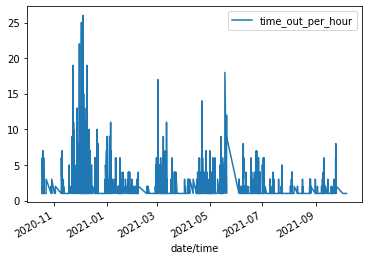

In [ ]:
time_out.plot(x = 'date/time', y = 'time_out_per_hour')

<AxesSubplot:xlabel='date/time'>

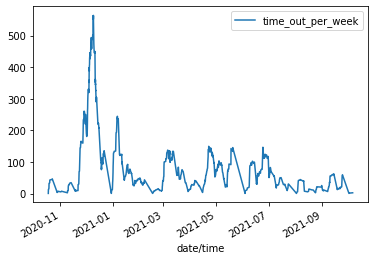

In [ ]:
time_out.plot(x = 'date/time', y = 'time_out_per_week')